In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Relative Compactness: This is the relative compactness of the building, 
# which is defined as the ratio of the building's volume to the volume of an 
# equivalent cuboid that encloses the building. This variable ranges from 0.62 to 0.98.

# • Surface Area - m²: This is the total surface area of the building, including walls, roof, and windows. 
# This variable ranges from 514.5 to 808.5 square meters.

# • Wall Area - m²: This is the total area of the building's walls. 
# This variable ranges from 245 to 416.5 square meters.

# • Roof Area - m²: This is the total area of the building's roof.
# This variable ranges from 110.25 to 220.5 square meters.

# • Overall Height - m: This is the height of the building.
# This variable ranges from 3.5 to 7.0 meters.

# • Orientation - 2:North, 3:East, 4:South, 5:West: This is the orientation of the building. 
# The values 2, 3, 4, and 5 represent North, East, South, and West orientations, respectively.

# • Glazing Area - 0%, 10%, 25%, 40% (of floor area): This is the total glazing area of the building, 
# expressed as a percentage of the floor area. This variable can take on one of four values: 0%, 10%, 25%, or 40%.

# • Glazing Area Distribution (Variance) - 1:Uniform, 2:North, 3:East, 4:South, 5:West: 
# This is the distribution of glazing area across the building.
# The values 1, 2, 3, 4, and 5 represent a uniform distribution and North, East, 
# South, and West distributions, respectively.

# • Heating Load - kWh/m²: This is the heating load of the building, expressed in kilowatt-hours per square meter. 
# This variable ranges from 6.01 to 43.1 kWh/m².

# • Cooling Load - kWh/m²: This is the cooling load of the building, expressed in kilowatt-hours per square meter. 
# This variable ranges from 10.9 to 48.03 kWh/m².

In [3]:
# Import Dataset
df= pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx",names=['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load'])

In [4]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [12]:
df.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:

# summary statistics of the data
df.describe()


# We can see the of ranges of different columns 

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


array([[<Axes: title={'center': 'Relative Compactness'}>,
        <Axes: title={'center': 'Surface Area'}>,
        <Axes: title={'center': 'Wall Area'}>],
       [<Axes: title={'center': 'Roof Area'}>,
        <Axes: title={'center': 'Overall Height'}>,
        <Axes: title={'center': 'Orientation'}>],
       [<Axes: title={'center': 'Glazing Area'}>,
        <Axes: title={'center': 'Glazing Area Distribution'}>,
        <Axes: title={'center': 'Heating Load'}>],
       [<Axes: title={'center': 'Cooling Load'}>, <Axes: >, <Axes: >]],
      dtype=object)

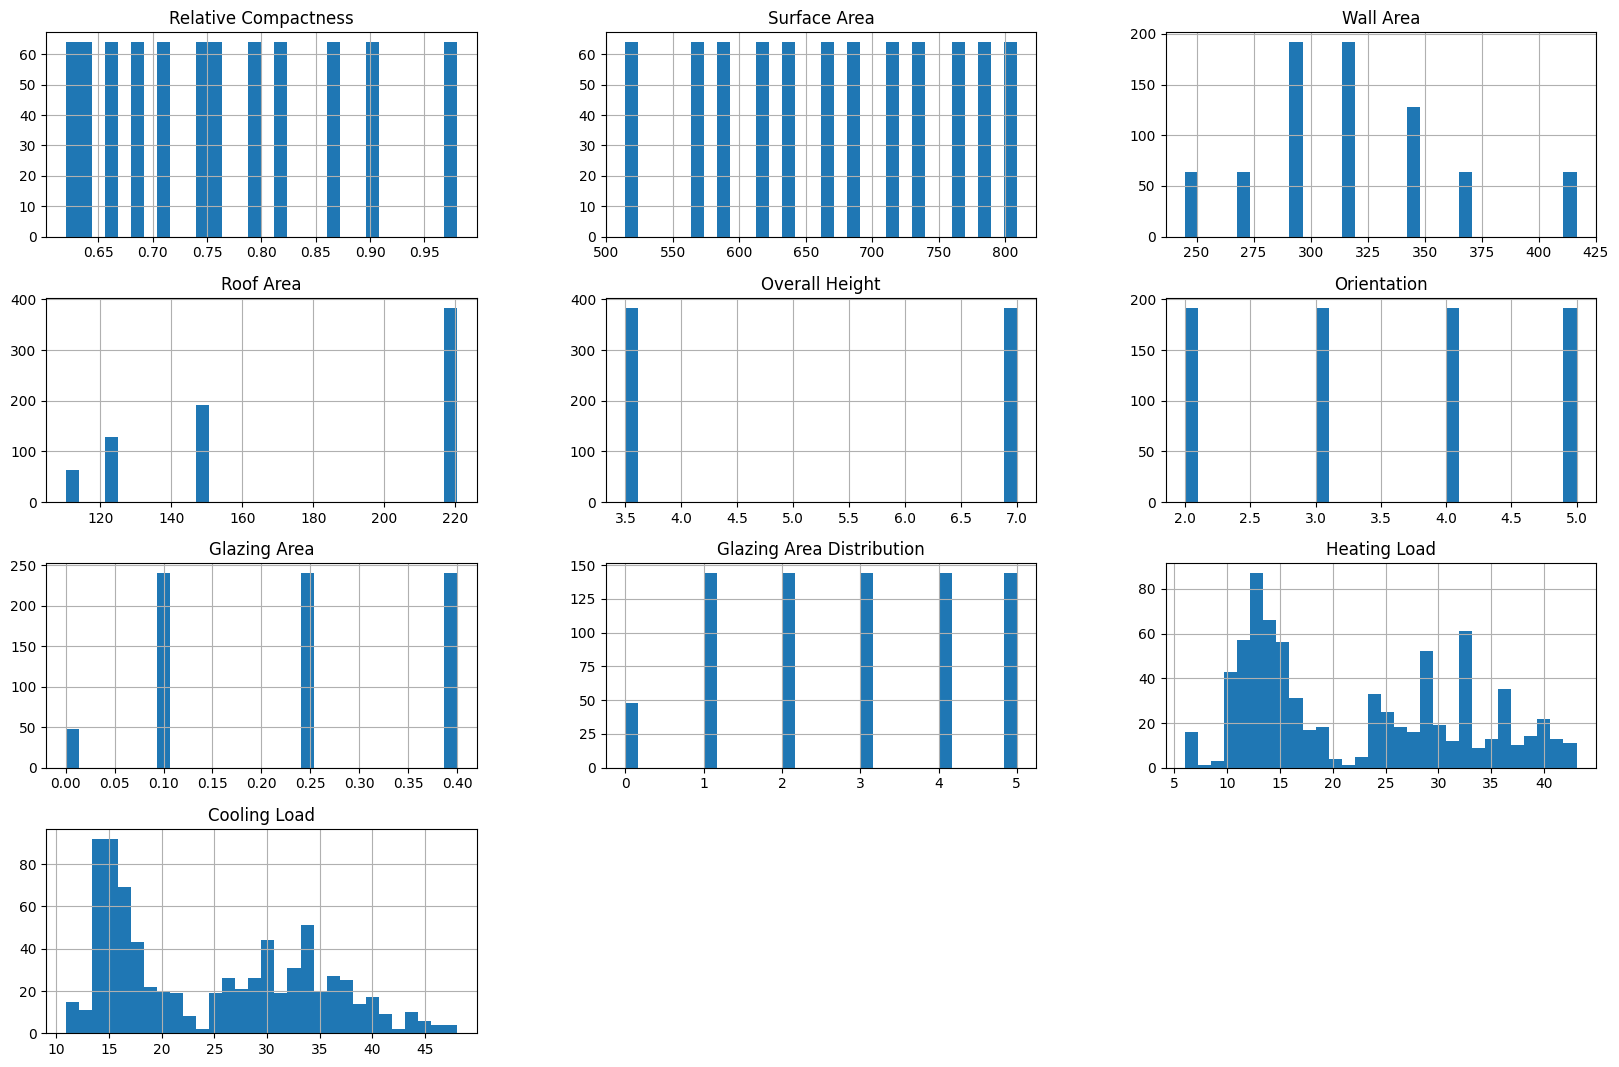

In [7]:
df.hist(figsize=(20,13),bins=30)

<Axes: >

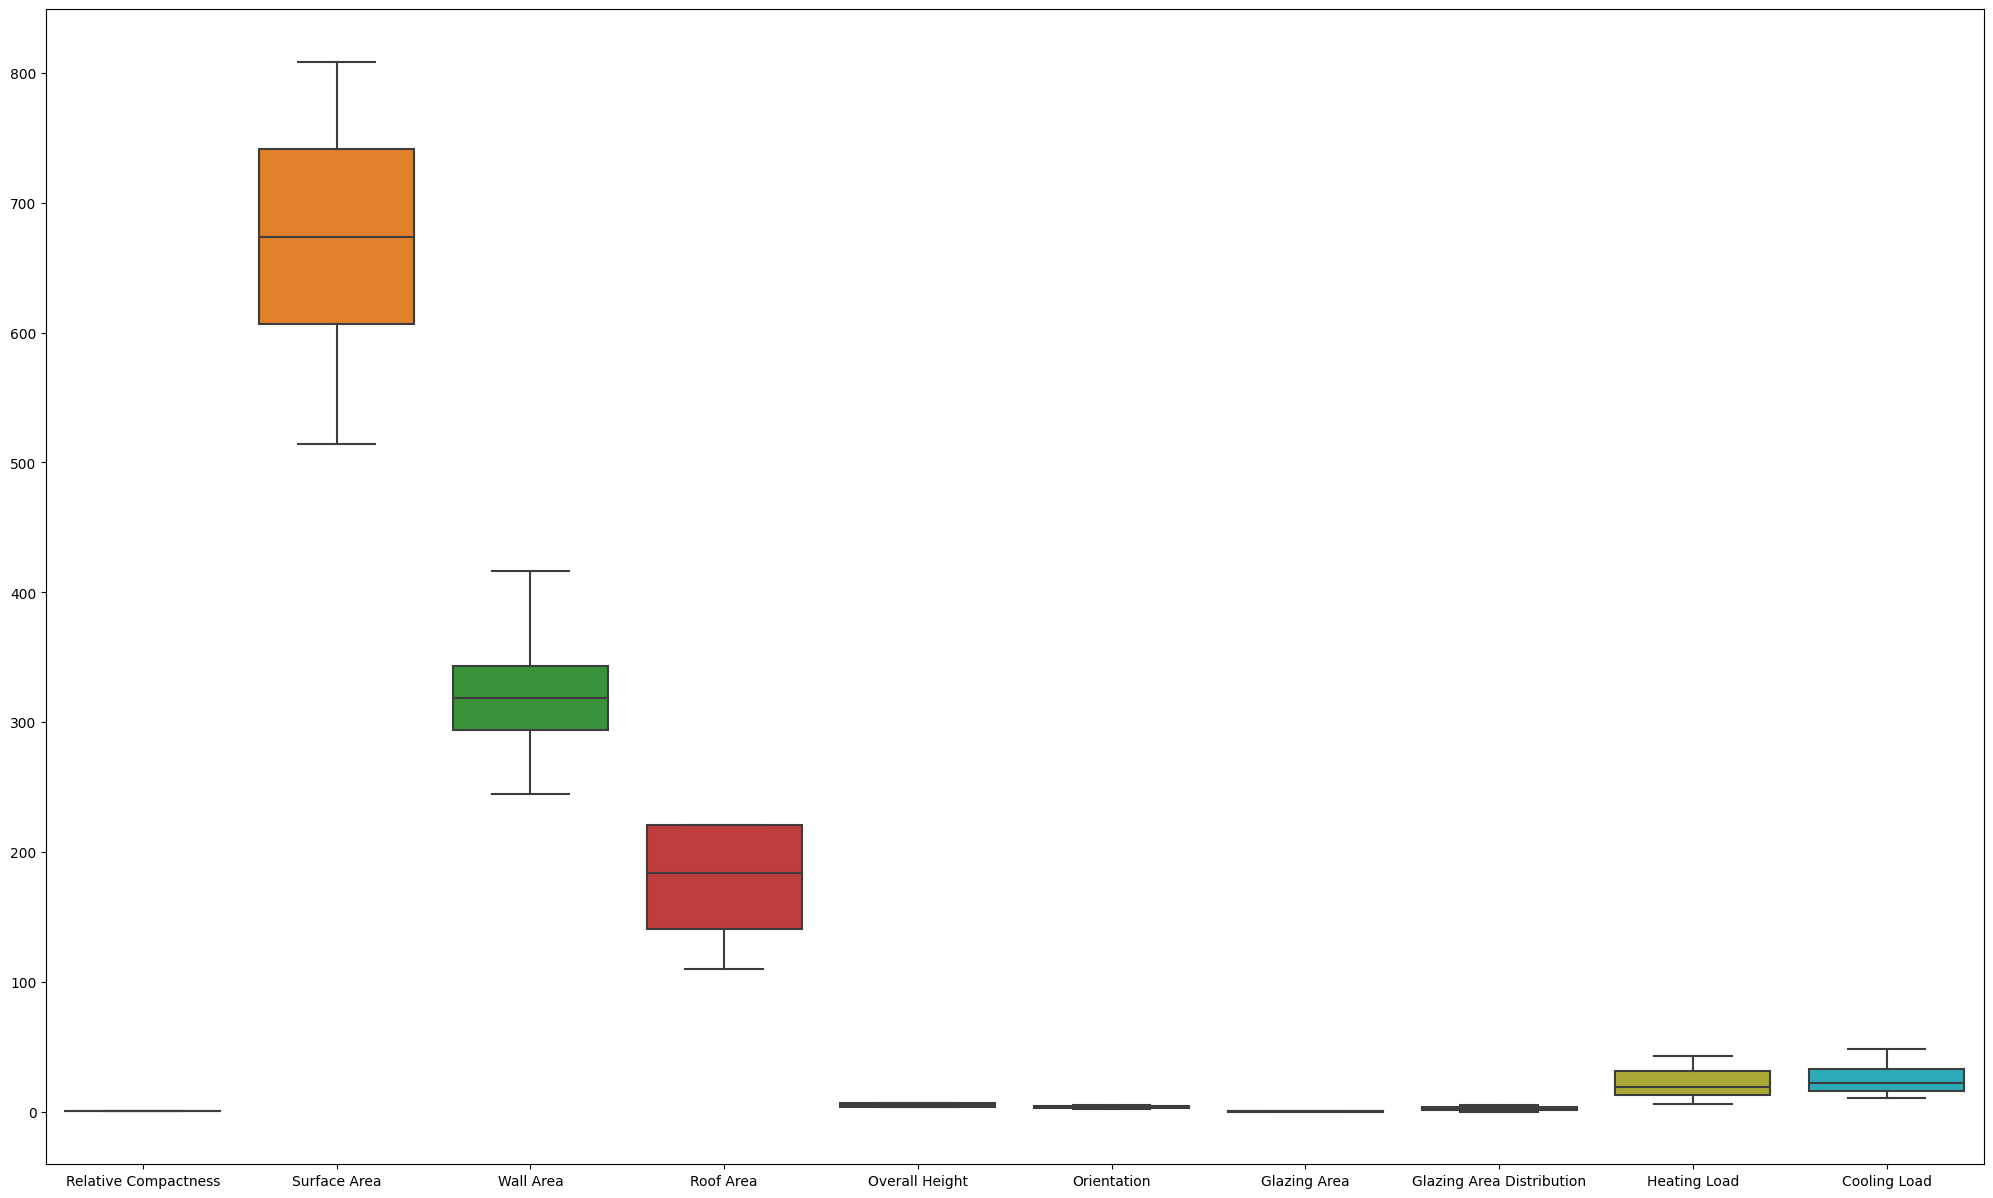

In [8]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df)

<Axes: >

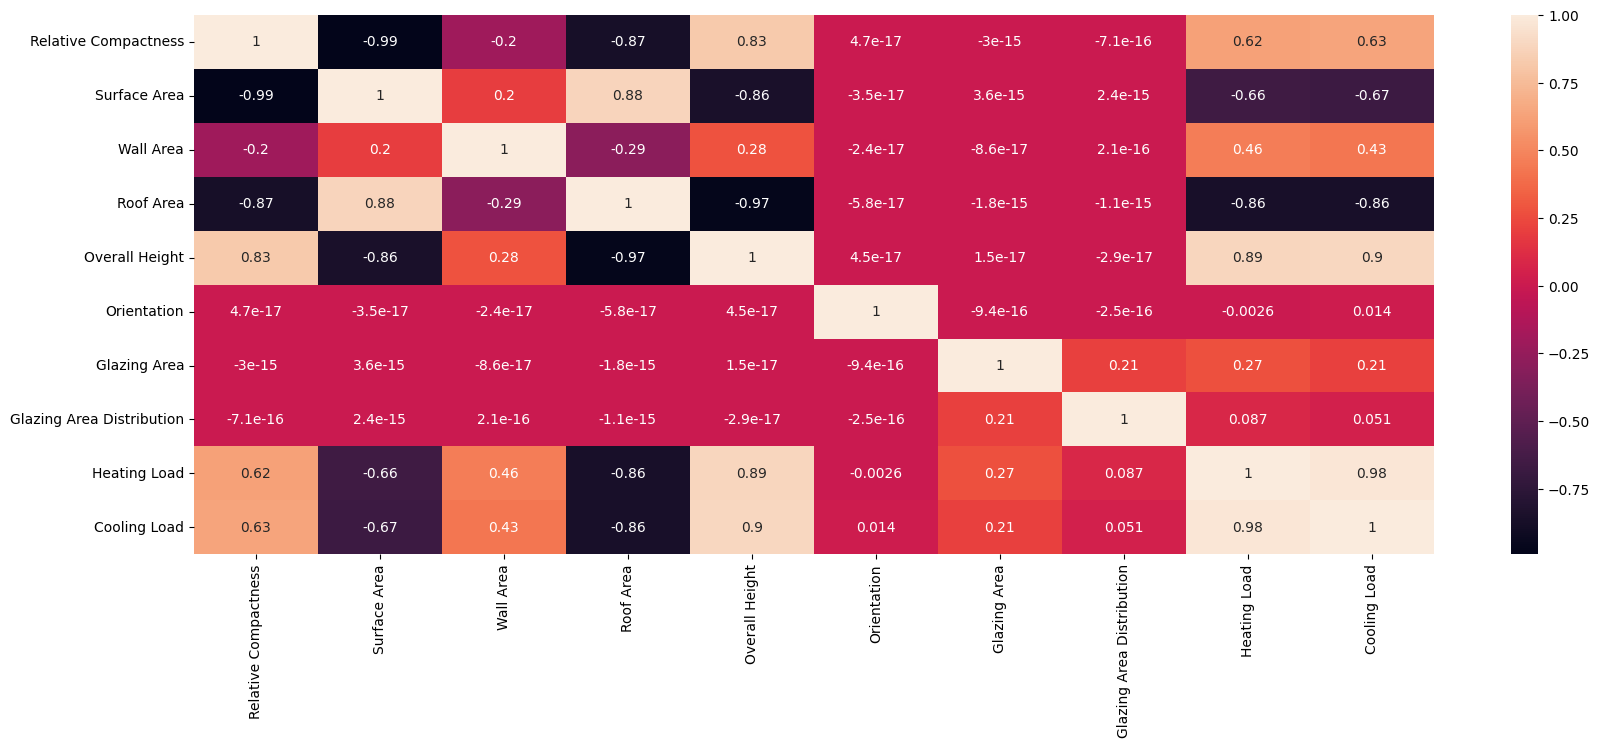

In [9]:
# Let check correlation 
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)

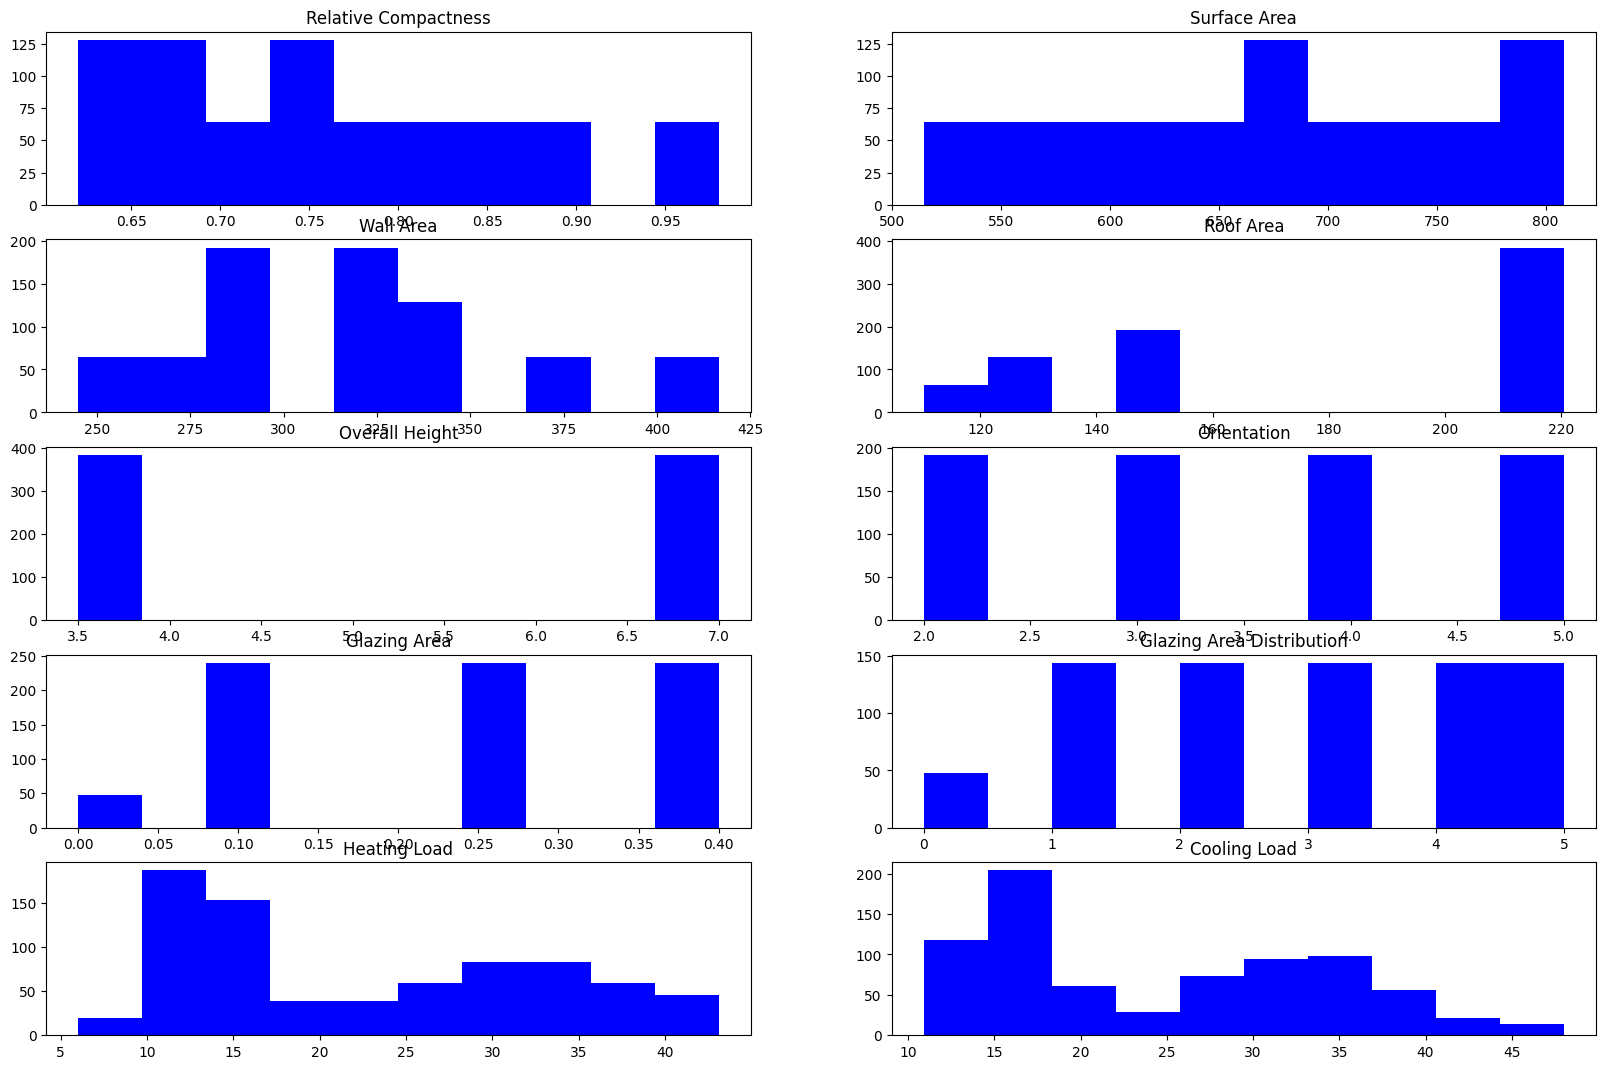

In [10]:
numerical_col = list(df.columns)

fig = plt.figure(figsize=(20,40))

for i in range(len(numerical_col)):
    plt.subplot(15,2,i+1)
    plt.hist(df[numerical_col[i]],color='blue')
    plt.title(numerical_col[i])


In [13]:
# Splitting Data Into train and test
print(df.columns)
x  = df.iloc[:,:-2]
y = df.iloc[:,-2:]


Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')


In [16]:
y.head()

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
from sklearn.linear_model import LinearRegression
lrregression=LinearRegression()
lrregression.fit(x_scaled,y)


LinearRegression()

In [22]:
lrregression.score(x_scaled,y)

0.9016142995876228

In [34]:
# Test Dataset 
test = x_scaled[np.random.randint(1,len(x_scaled))].reshape(1,-1)
lrregression.predict(test)  # Predicted Result

array([[40.01422844, 39.96935481]])

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtregressor=DecisionTreeRegressor()
dtregressor.fit(x_scaled,y)

DecisionTreeRegressor()

In [36]:
dtregressor.score(x_scaled,y)

1.0

In [37]:
# Test Dataset 
test = x_scaled[np.random.randint(1,len(x_scaled))].reshape(1,-1)
dtregressor.predict(test)  # Predicted Result

array([[16.99, 19.65]])

In [38]:
from sklearn.ensemble import RandomForestRegressor
rdregressor=RandomForestRegressor()
rdregressor.fit(x_scaled,y)

RandomForestRegressor()

In [40]:
rdregressor.score(x_scaled,y)

0.9971764091997399

In [41]:
# Test Dataset 
test = x_scaled[np.random.randint(1,len(x_scaled))].reshape(1,-1)
dtregressor.predict(test)  # Predicted Result

array([[36.43, 36.62]])